# Chapter 2

In [2]:
import arviz as az
import numpy as np
import pymc as pm

from matplotlib import pylab as plt
from scipy import stats

In [3]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [4]:
# express the above scenarios as the number of waters in each
W = np.array([3, 3, 5])
# give the total number of trials
Total = np.array([3, 4, 7])

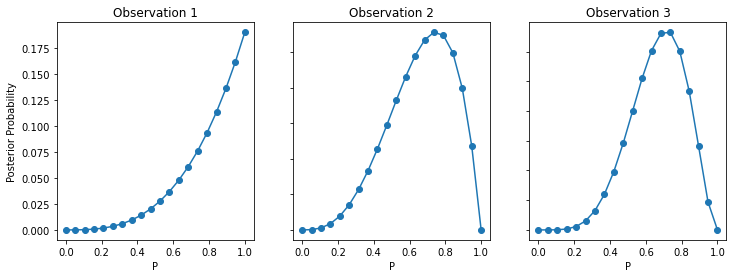

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

for i, j, ax, ix in zip(W, Total, np.ravel(axs), range(3)):
    p = np.linspace(0, 1, 20)
    # compute the likelihood for each value of p, assuming 6 success and 3 fails
    likelihood = stats.binom.pmf(k=i, n=j, p=p)
    # prior is step function
    prior = 1
    # posterior
    post = likelihood * prior
    # normalise the posterior
    post = post / np.sum(post)
    ax.plot(p, post)
    ax.scatter(p, post)
    ax.set_title("Observation " + str(ix + 1))
    ax.set(xlabel="P", ylabel="Posterior Probability")

for ax in axs.flat:
    ax.label_outer()

## 2M2

In [ ]:
https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

array([3, 4, 7])

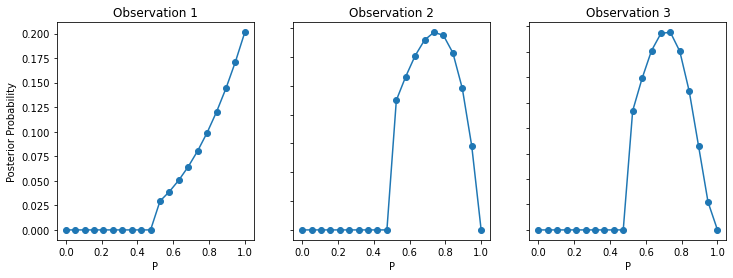

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

for i, j, ax, ix in zip(W, Total, np.ravel(axs), range(3)):
    p = np.linspace(0, 1, 20)
    # compute the likelihood for each value of p, assuming 6 success and 3 fails
    likelihood = stats.binom.pmf(k=i, n=j, p=p)
    # prior is step function
    prior = np.heaviside(p - 0.5, 0.5) * 2
    # posterior
    post = likelihood * prior
    # normalise the posterior
    post = post / np.sum(post)
    ax.plot(p, post)
    ax.scatter(p, post)
    ax.set_title("Observation " + str(ix + 1))
    ax.set(xlabel="P", ylabel="Posterior Probability")

for ax in axs.flat:
    ax.label_outer()

In [ ]:
!